# Loading Dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pylab as plt
%pylab inline
df = pd.read_excel('COVID-19.xlsx')
df.head()

Populating the interactive namespace from numpy and matplotlib


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


In [2]:
from pyFTS.common import Transformations
tdiff = Transformations.Differential(1)

In [3]:
#Aggregate by continentExp
continentExp = pd.pivot_table(df, values='cases', index=['dateRep'],columns=['continentExp'], aggfunc=np.sum, fill_value=0)
#Aggregate by countriesAndTerritories
countriesAndTerritories = pd.pivot_table(df, values='cases', index=['dateRep'],columns=['countriesAndTerritories'], aggfunc=np.sum, fill_value=0)
data = continentExp

## Continent-Wise Dataset

In [4]:
continentExp

continentExp,Africa,America,Asia,Europe,Oceania,Other
dateRep,,,,,,
2019-12-31,0,0,27,0,0,0
2020-01-01,0,0,0,0,0,0
2020-01-02,0,0,0,0,0,0
2020-01-03,0,0,17,0,0,0
2020-01-04,0,0,0,0,0,0
...,...,...,...,...,...,...
2020-12-10,18892,325238,76203,255762,19,0
2020-12-11,19111,325486,75131,273397,227,0
2020-12-12,18909,339515,71851,226696,169,0


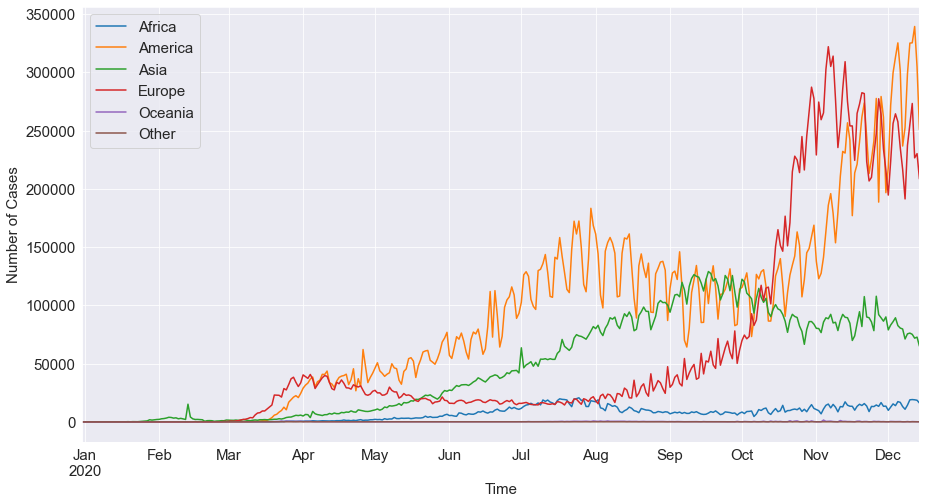

In [6]:
import seaborn as sns
sns.set_style('darkgrid')
col = data.columns
for c in col:
    data[c].plot(figsize=(15,8), label=c)

plt.legend(prop={'size': 15})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Cases', fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.show()

In [7]:
data = data["Asia"].values
data_diff = tdiff.apply(data)

# Results
## Influence of Number of Partitions

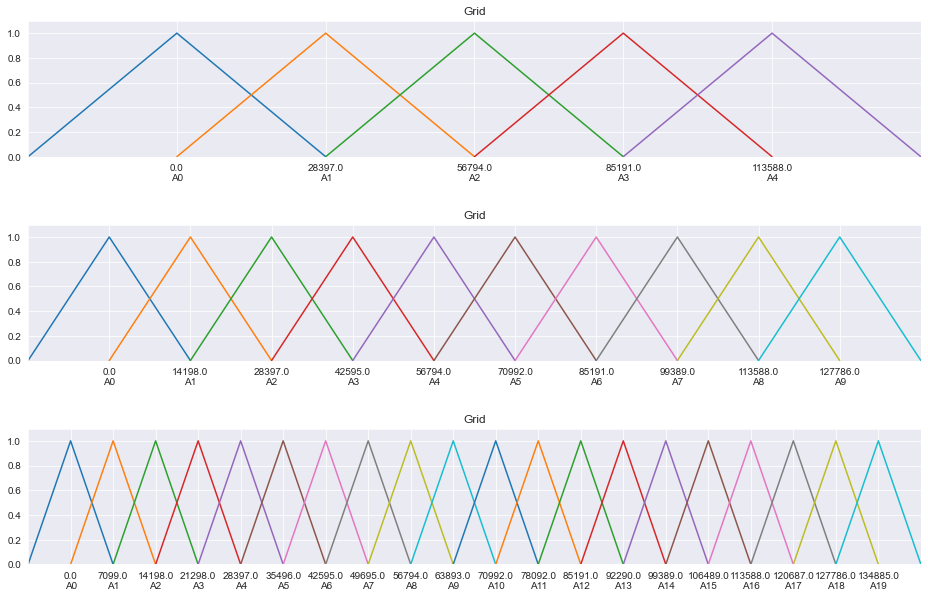

In [15]:
from pyFTS.partitioners import Grid
from pyFTS.common import Membership as mf

fs1 = Grid.GridPartitioner(data=data,npart = 5)
fs2 = Grid.GridPartitioner(data=data,npart = 10)
fs3 = Grid.GridPartitioner(data=data,npart = 20)
# fs4 = Grid.GridPartitioner(data=data,npart = 35)
fs = [fs1, fs2, fs3]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=[16,10])
plt.subplots_adjust(hspace = 0.5)


# fig.tight_layout()

for i, axis in enumerate(ax):
    fs[i].plot(axis)


In [16]:
fuzzyfied = []
for i in range(3):
    fuzzyfied.append(fs[i].fuzzyfy(data, method='maximum', mode='sets'))

In [17]:
from pyFTS.common import FLR
for i in range(3):
    patterns = FLR.generate_non_recurrent_flrs(fuzzyfied[i])
    print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A1', 'A2 -> A3', 'A3 -> A3', 'A3 -> A2', 'A3 -> A4', 'A4 -> A4', 'A4 -> A3']
['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A1', 'A2 -> A3', 'A3 -> A3', 'A3 -> A2', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A4', 'A5 -> A6', 'A6 -> A6', 'A6 -> A5', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A7', 'A8 -> A9', 'A9 -> A9', 'A9 -> A8', 'A6 -> A8', 'A8 -> A6']
['A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A0', 'A0 -> A2', 'A2 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A6', 'A6 -> A5', 'A6 -> A9', 'A9 -> A7', 'A7 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A9', 'A9 -> A10', 'A10 -> A9', 'A9 -> A9', 'A10 -> A11', 'A11 -> A10', 'A10 -> A10', 'A11 -> A12', 'A12 -> A11', 'A12 -> A13', 'A13 -> A12', 'A13 -> A13', 'A13 -> A11', 'A11 -> A11', 'A11 -> A13', 'A13 -> A14',

In [18]:
from pyFTS.models import chen
models = []
for i in range(3):
    model = chen.ConventionalFTS(partitioner=fs[i])
#     model.append_transformation(tdiff)
    model.fit(data)
    print(model)
    models.append(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7,A8
A7 -> A6,A7,A8
A8 -> A6,A7,A8,A9
A9 -> A8,A9

Conventional FTS:
A0 -> A0,A1,A2
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A3,A4
A4 -> A4,A5
A5 -> A5,A6
A6 -> A5,A6,A9
A7 -> A7,A8
A8 -> A8,A9
A9 -> A10,A11,A7,A9
A10 -> A10,A11,A12,A9
A11 -> A10,A11,A12,A13,A15,A9
A12 -> A10,A11,A12,A13,A15
A13 -> A11,A12,A13,A14,A15
A14 -> A13,A14,A15,A16
A15 -> A13,A14,A15,A16,A17,A18
A16 -> A14,A15,A17,A18
A17 -> A16,A17,A18
A18 -> A16,A17,A18



In [19]:
for i in range(3):
    fuzzyfied_ex = fs[i].fuzzyfy(18876, method='maximum', mode='sets')
    print(fuzzyfied_ex)
    print(models[i].predict([18876]))

A1
[28396.940000000002]
A1
[14198.470000000001]
A3
[24847.322500000002]


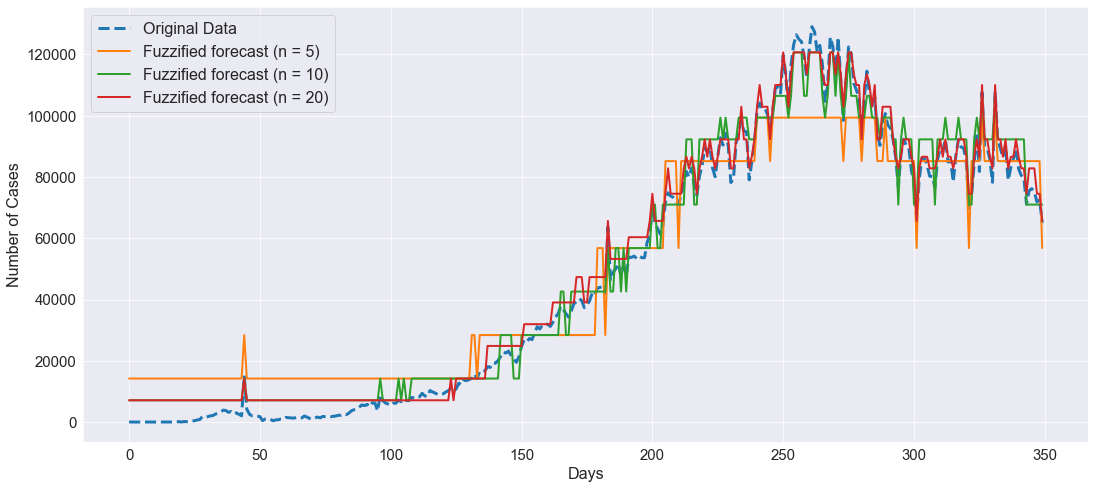

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[18,8])
forecasts = []
for i in range(3):
#     forecast = models[i].predict(data[int(0.25*len(data)):int(0.75*len(data))])
    forecast = models[i].predict(data)
#     forecast.insert(0,None)
    forecasts.append(forecast)

# orig, = plot(data[int(0.25*len(data)):int(0.75*len(data))], label="Original Data", linewidth=3, linestyle = '--')
orig, = plot(data, label="Original Data", linewidth=3, linestyle = '--')
handles = [orig]
t_arr = [5, 10, 20]
# stle = ['dotted', '-', '-.']
for i in range(3):
    pred, = plot(forecasts[i], label="Fuzzified forecast (n = " + str(t_arr[i]) + ")", linewidth = 2)
    handles.append(pred)
    
plt.legend(handles=handles, prop={'size': 16})
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.ylabel('Number of Cases', fontsize = 16)
plt.xlabel('Days', fontsize = 16)
plt.show()

## Influence of Partition Types

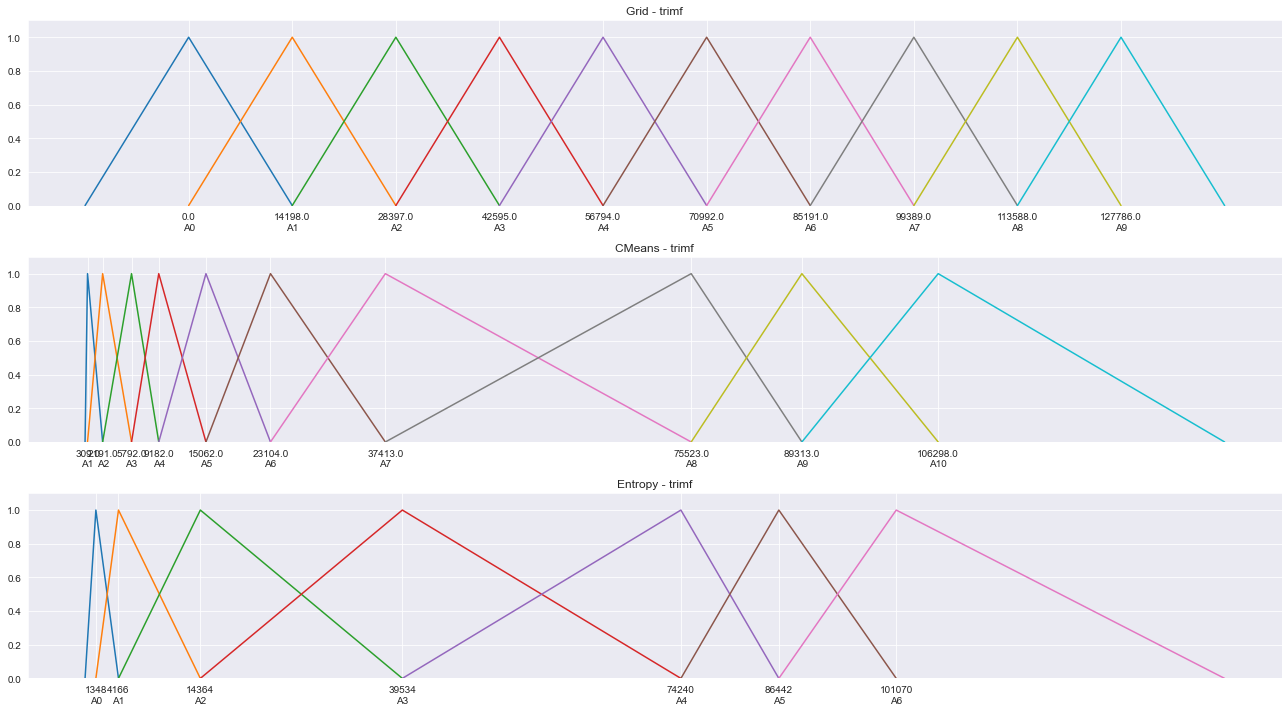

In [21]:
from pyFTS.partitioners import CMeans, Grid, FCM, Huarng, Entropy, Util as pUtil
from pyFTS.common import Membership as mf
fs = pUtil.explore_partitioners(data, 10, methods=[Grid.GridPartitioner, CMeans.CMeansPartitioner, Entropy.EntropyPartitioner], mf=[mf.trimf], size = [18, 10])

In [22]:
fuzzyfied = []
for i in range(3):
    fuzzyfied.append(fs[i].fuzzyfy(data, method='maximum', mode='sets'))

In [23]:
from pyFTS.common import FLR
for i in range(3):
    patterns = FLR.generate_non_recurrent_flrs(fuzzyfied[i])
    print([str(k) for k in patterns])

['A0 -> A0', 'A0 -> A1', 'A1 -> A0', 'A1 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A1', 'A2 -> A3', 'A3 -> A3', 'A3 -> A2', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A4', 'A5 -> A6', 'A6 -> A6', 'A6 -> A5', 'A6 -> A7', 'A7 -> A6', 'A7 -> A7', 'A7 -> A8', 'A8 -> A8', 'A8 -> A7', 'A8 -> A9', 'A9 -> A9', 'A9 -> A8', 'A6 -> A8', 'A8 -> A6']
['A1 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A5', 'A5 -> A3', 'A3 -> A2', 'A2 -> A1', 'A2 -> A3', 'A3 -> A3', 'A2 -> A4', 'A4 -> A3', 'A3 -> A4', 'A4 -> A4', 'A4 -> A5', 'A5 -> A5', 'A5 -> A6', 'A6 -> A6', 'A6 -> A7', 'A7 -> A7', 'A7 -> A6', 'A7 -> A8', 'A8 -> A7', 'A8 -> A8', 'A8 -> A9', 'A9 -> A8', 'A9 -> A9', 'A9 -> A10', 'A10 -> A9', 'A10 -> A10', 'A8 -> A10']
['A0 -> A0', 'A0 -> A1', 'A1 -> A1', 'A1 -> A0', 'A0 -> A2', 'A2 -> A1', 'A1 -> A2', 'A2 -> A2', 'A2 -> A3', 'A3 -> A3', 'A3 -> A4', 'A4 -> A3', 'A4 -> A4', 'A4 -> A5', 'A5 -> A4', 'A5 -> A5', 'A5 -> A6', 'A6 -> A5', 'A6 -> A6', 'A6 -> A4', 'A4 -> A6']


In [24]:
from pyFTS.models import chen
models = []
for i in range(3):
    model = chen.ConventionalFTS(partitioner=fs[i])
#     model.append_transformation(tdiff)
    model.fit(data)
    print(model)
    models.append(model)

Conventional FTS:
A0 -> A0,A1
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A2,A3,A4
A4 -> A3,A4,A5
A5 -> A4,A5,A6
A6 -> A5,A6,A7,A8
A7 -> A6,A7,A8
A8 -> A6,A7,A8,A9
A9 -> A8,A9

Conventional FTS:
A1 -> A1,A2
A3 -> A2,A3,A4
A2 -> A1,A2,A3,A4,A5
A4 -> A3,A4,A5
A5 -> A3,A5,A6
A6 -> A6,A7
A7 -> A6,A7,A8
A8 -> A10,A7,A8,A9
A9 -> A10,A8,A9
A10 -> A10,A9

Conventional FTS:
A0 -> A0,A1,A2
A1 -> A0,A1,A2
A2 -> A1,A2,A3
A3 -> A3,A4
A4 -> A3,A4,A5,A6
A5 -> A4,A5,A6
A6 -> A4,A5,A6



In [25]:
for i in range(3):
    fuzzyfied_ex = fs[i].fuzzyfy(18876, method='maximum', mode='sets')
    print(fuzzyfied_ex)
    print(models[i].predict([18876]))

A1
[14198.470000000001]
A5
[14652.603666666668]
A2
[19354.666666666668]


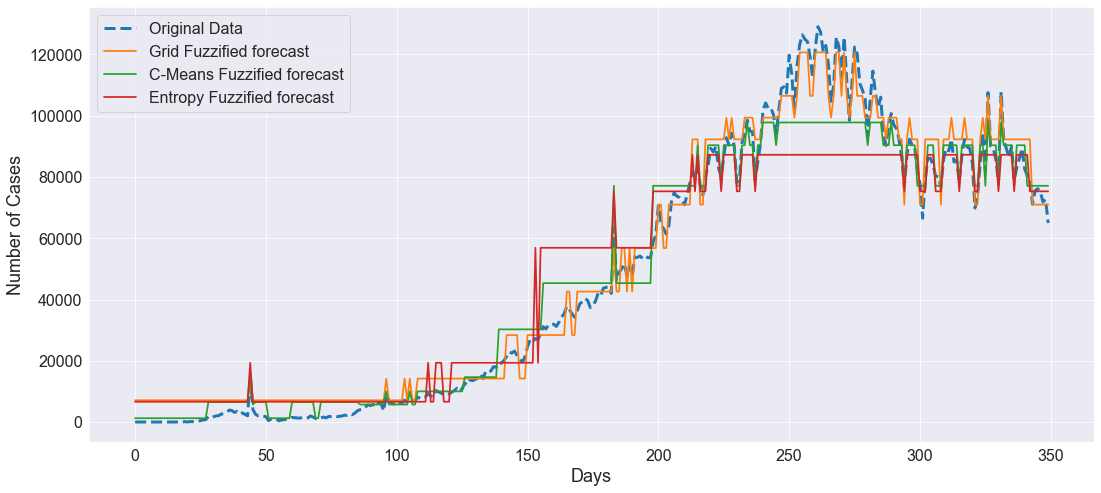

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[18,8])
forecasts = []
for i in range(3):
    forecast = models[i].predict(data)
#     forecast.insert(0,None)
    forecasts.append(forecast)

orig, = plot(data, label="Original Data", linewidth=3, linestyle = '--')
handles = [orig]
# for i in range(3):
#     pred, = plot(forecasts[i], label="fuzzified forecast " + str(i+1))
#     handles.append(pred)

method_arr = ["Grid", "C-Means", "Entropy"]

for i in range(3):
    pred, = plot(forecasts[i], label= method_arr[i] + " Fuzzified forecast", linewidth = 1.75)
    handles.append(pred)
    
plt.legend(handles=handles, prop={'size': 16}, loc = 2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 18)
plt.xlabel('Days', fontsize = 18)
plt.show()

## Comparison of FTS with Moving Average 

In [19]:
fs = Grid.GridPartitioner(data=data,npart = 35)
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')
model = chen.ConventionalFTS(partitioner=fs)
# model.append_transformation(tdiff)
model.fit(data)

In [20]:
data1 = pd.DataFrame(data)
pred_arima = data1.rolling(window=6).mean()

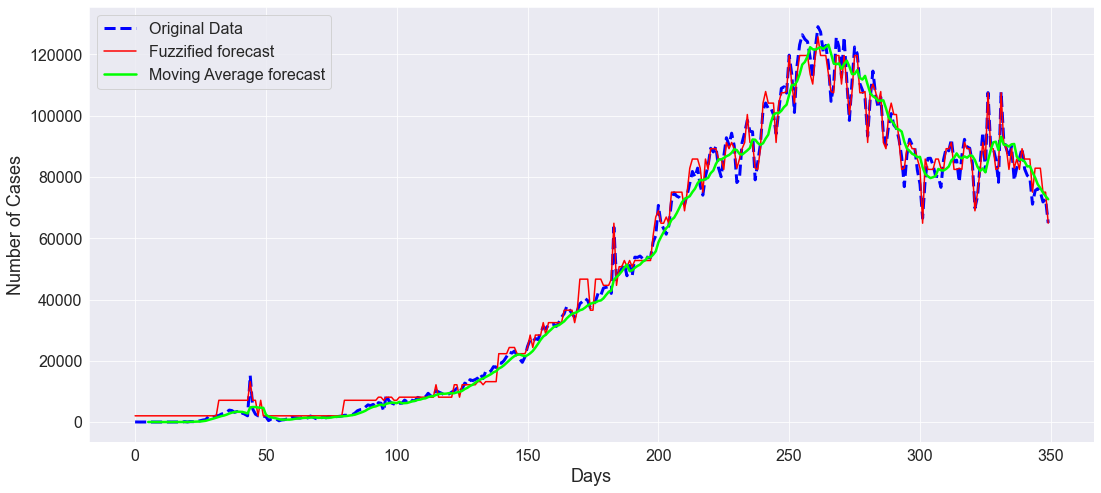

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[18,8])
forecast = model.predict(data)

orig, = plot(data, label="Original Data", linewidth=3, linestyle = '--', color = 'blue')
handles = [orig]
pred1, = plot(forecast, label="Fuzzified forecast", linewidth = 1.5, color = 'red')
pred2, = plot(pred_arima[1:], label="Moving Average forecast", linewidth = 2.5, color = 'lime')
    

plt.legend(handles=[orig, pred1, pred2], prop={'size': 16}, loc = 2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 18)
plt.xlabel('Days', fontsize = 18)
plt.show()

In [22]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(data, forecast)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 2890.1215292235893, MSE:8352802.453681698


In [23]:
mse = mean_squared_error(data, pred_arima.fillna(0))
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 4746.058350449667, MSE:22525069.865873016


## Comparison of Improved Weighted FTS with ARIMA

In [33]:
from pyFTS.models import ismailefendi
model2 = ismailefendi.ImprovedWeightedFTS(partitioner=Grid.GridPartitioner(data=data,npart = 20))
model2.append_transformation(tdiff)
model2.fit(data, order = 1)
print(model2)

Improved Weighted FTS:
A3 -> A0(1.0)
A4 -> A0(1.0)
A2 -> A0(0.583),A1(0.333),A2(0.083)
A1 -> A0(0.676),A1(0.243),A2(0.081)
A0 -> A0(0.882),A1(0.081),A2(0.027),A3(0.003),A4(0.007)



In [34]:
from statsmodels.tsa.arima.model import ARIMA
model_ar = ARIMA(data, order = (1, 1, 1))
model_ar = model_ar.fit()
pred_arima = model_ar.predict(start = 0, end = len(data))

In [35]:
forecasts = model2.predict(data)

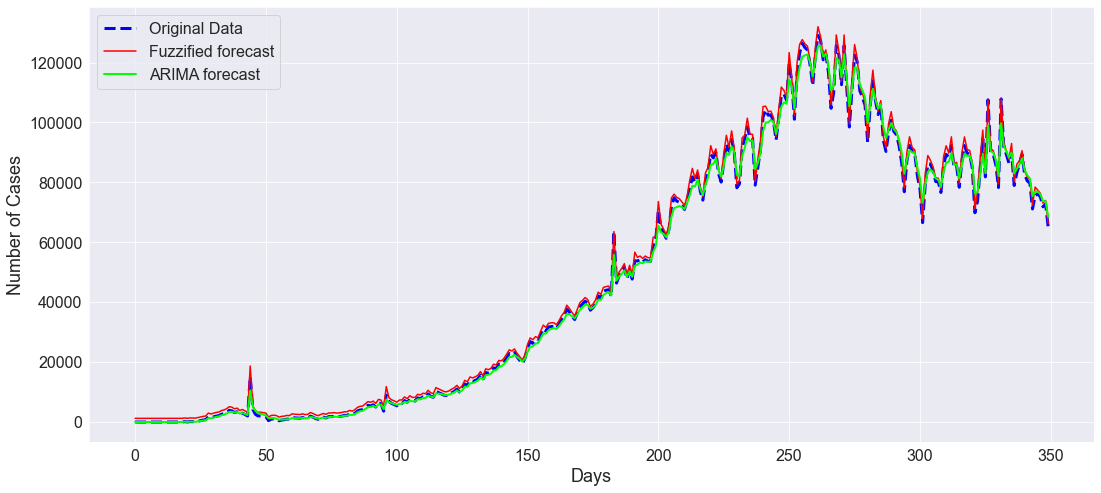

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[18,8])
forecast = model.predict(data)

orig, = plot(data, label="Original Data", linewidth=3, linestyle = '--', color = 'blue')
handles = [orig]
pred1, = plot(forecasts, label="Fuzzified forecast", linewidth = 1.5, color = 'red')
pred2, = plot(pred_arima[1:], label="ARIMA forecast", linewidth = 2, color = 'lime')
    

plt.legend(handles=[orig, pred1, pred2], prop={'size': 16}, loc = 2)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Number of Cases', fontsize = 18)
plt.xlabel('Days', fontsize = 18)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(data, forecasts)
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 1604.047584781511, MSE:2572968.6542433985


In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(data, pred_arima[1:])
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 1964.64381867733, MSE:3859825.334267042
